## Data 
Kami akan menggunakan data dari kumpulan data Kaggle: https://www.kaggle.com/harlfoxem/housesalesprediction 
#### Kolom Fitur 
* id - ID unik untuk setiap rumah yang terjual 
* date - Tanggal penjualan rumah 
* price - Harga setiap rumah yang dijual 
* bedrooms - Jumlah kamar tidur 
* bathrooms - Jumlah kamar mandi, di mana 0,5 menyumbang kamar dengan toilet tetapi tidak ada pancuran 
* sqft_living - Meter persegi ruang tamu interior apartemen 
* sqft_lot - Meter persegi luas lahan 
* floors - Jumlah lantai 
* waterfront - Variabel dummy apakah apartemen itu menghadap ke tepi laut atau tidak 
* view - Indeks dari 0 hingga 4 tentang seberapa bagus tampilan properti itu 
* condition - Indeks dari 1 hingga 5 pada kondisi apartemen, 
* grade - Indeks dari 1 hingga 13, di mana 1-3 kurang dari konstruksi dan desain bangunan, 7 memiliki tingkat konstruksi dan desain rata-rata, dan 11-13 memiliki tingkat kualitas konstruksi dan desain yang tinggi. 
* sqft_above - Ukuran luas ruangan interior perumahan yang berada di atas permukaan tanah 
* sqft_basement - Ukuran luas ruangan interior perumahan yang berada di bawah permukaan tanah 
* yr_built - Tahun rumah pertama kali dibangun 
* yr_renovated - Tahun renovasi terakhir rumah 
* zipcode - Area kode pos rumah itu berada 
* lat - Lattitude * bujur - Bujur 
* sqft_living15 - Ukuran luas ruang interior perumahan untuk 15 tetangga terdekat 
* sqft_lot15 - Ukuran luas bidang tanah dari 15 tetangga terdekat

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('ticks')

In [3]:
df = pd.read_csv('kc_house_data.csv')

# EDA

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

tidak ada missing data

sebaran harga rumah


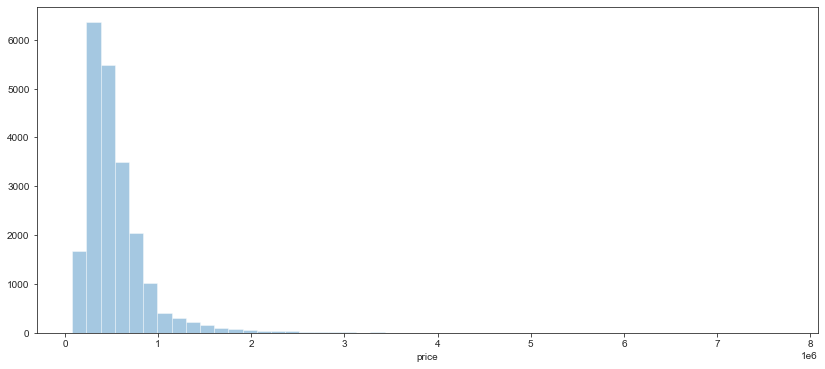

In [5]:
plt.figure(figsize=(14,6))
sns.distplot(df['price'],kde=False, bins=50)
print('sebaran harga rumah')

jumlah kamar tidur


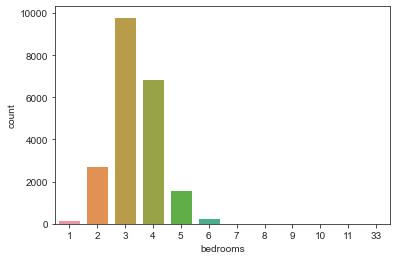

In [6]:
sns.countplot(df['bedrooms'])
print('jumlah kamar tidur')

pengaruh luas (meter persegi) terhadap harga


<Figure size 864x576 with 0 Axes>

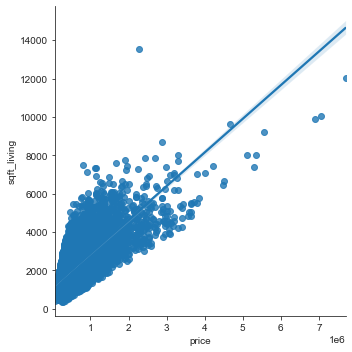

In [7]:
plt.figure(figsize=(12,8))
sns.lmplot(x='price',y='sqft_living',data=df,)
print('pengaruh luas (meter persegi) terhadap harga')

saya akan mencoba melakukan plot data harga terhadap lokasi berdasarkan zipcode, kurva tersebut bisa dicocokan dengan peta asli untuk melihat sebaran datanya. 

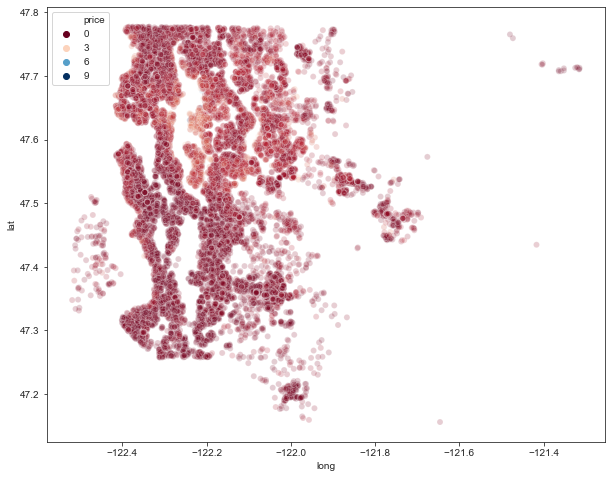

In [8]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price',palette='RdBu',alpha=0.2)

disini saya akan mencoba memodifikasi beberapa fitur untuk mendapatkan data yang lebih bermanfaat


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

id kurang berguna dalam analisis ini sehingga saya memutuskan untuk drop kolom tersebut

In [10]:
df = df.drop('id',axis=1)

In [11]:
df['date'].head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

tipe data date saya akan modifikasi agar saya bisa melihat penjualan per bulan dan per tahun nya

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df['month'] = df['date'].apply(lambda date:date.month)

In [14]:
df['year'] = df['date'].apply(lambda date:date.year)

In [15]:
df = df.drop('date',axis=1)

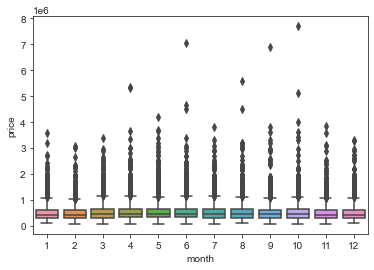

In [16]:
sns.boxplot(x='month',y='price',data=df)

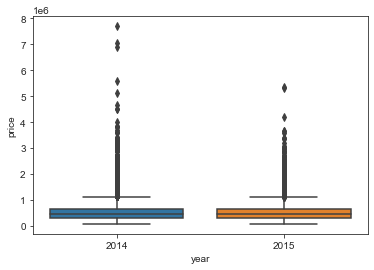

In [17]:
sns.boxplot(x='year',y='price',data=df)

kemudian saya akan drop data kategori lain  yaitu  zip code

In [18]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [19]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [20]:
df = df.drop('zipcode',axis=1)

# Treating Data

## Training Data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [22]:
X = df.drop('price',axis=1)
y = df['price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling Data

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam

In [27]:
df.shape

(21597, 20)

In [28]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layer 1
model.add(Dense(19,activation='relu'))

# hidden layer 2
model.add(Dense(19,activation='relu'))

# hidden layer 3
model.add(Dense(19,activation='relu'))

# output layer 
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam',loss='mse')

In [29]:
model.fit(x=X_train,y=y_train.values,batch_size=128,epochs=400,validation_data=(X_test,y_test.values))

Epoch 1/400
119/119 [==============================] - 0s 4ms/step - loss: 430238269440.0000 - val_loss: 418906210304.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 428929679360.0000 - val_loss: 414212980736.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 409370066944.0000 - val_loss: 369079025664.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 314815774720.0000 - val_loss: 221860724736.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 156126380032.0000 - val_loss: 102889111552.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 100518789120.0000 - val_loss: 95058296832.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 97376960512.0000 - val_loss: 93463904256.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 95613378560.0000 - val_loss: 91701100544.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 2ms/step - loss: 37077565440.0000 - val_loss: 35781177344.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 36880412672.0000 - val_loss: 35680174080.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 36741758976.0000 - val_loss: 35510038528.0000
Epoch 71/400
119/119 [==============================] - 0s 3ms/step - loss: 36576911360.0000 - val_loss: 35295227904.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 36407435264.0000 - val_loss: 35197255680.0000
Epoch 73/400
119/119 [==============================] - 0s 3ms/step - loss: 36317483008.0000 - val_loss: 35003736064.0000
Epoch 74/400
119/119 [==============================] - 0s 3ms/step - loss: 36121079808.0000 - val_loss: 34879516672.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 36007858176.0000 - val_loss: 34719854592.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 32645644288.0000 - val_loss: 31262400512.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 32617885696.0000 - val_loss: 31202256896.0000
Epoch 137/400
119/119 [==============================] - ETA: 0s - loss: 32821739520.000 - 0s 3ms/step - loss: 32625395712.0000 - val_loss: 31239829504.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 32590090240.0000 - val_loss: 31156652032.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32558821376.0000 - val_loss: 31309467648.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 32523243520.0000 - val_loss: 31077089280.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32501381120.0000 - val_loss: 31108407296.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 32450177024.0000 - val_loss:

119/119 [==============================] - 0s 2ms/step - loss: 31251386368.0000 - val_loss: 29630357504.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 31234809856.0000 - val_loss: 29600454656.0000
Epoch 203/400
119/119 [==============================] - 0s 3ms/step - loss: 31242387456.0000 - val_loss: 29689583616.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31215869952.0000 - val_loss: 29561434112.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 31196956672.0000 - val_loss: 29547792384.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31194486784.0000 - val_loss: 29531695104.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31183081472.0000 - val_loss: 29506387968.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 31185727488.0000 - val_loss: 29526482944.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30375286784.0000 - val_loss: 28489578496.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 30391500800.0000 - val_loss: 28468453376.0000
Epoch 269/400
119/119 [==============================] - 0s 3ms/step - loss: 30356588544.0000 - val_loss: 28488372224.0000
Epoch 270/400
119/119 [==============================] - 0s 3ms/step - loss: 30348257280.0000 - val_loss: 28468848640.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 30321774592.0000 - val_loss: 28509034496.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30310858752.0000 - val_loss: 28415651840.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30286039040.0000 - val_loss: 28397674496.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30339764224.0000 - val_loss: 28378120192.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29718849536.0000 - val_loss: 27553914880.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 29688041472.0000 - val_loss: 27530704896.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 29660788736.0000 - val_loss: 27574353920.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 29709039616.0000 - val_loss: 27526582272.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 29655857152.0000 - val_loss: 27509891072.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 29639159808.0000 - val_loss: 27547971584.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 29653035008.0000 - val_loss: 27492356096.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 29612042240.0000 - val_loss: 27512608768.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29111105536.0000 - val_loss: 26842556416.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 29061865472.0000 - val_loss: 26806329344.0000


In [30]:
losses = pd.DataFrame(model.history.history)

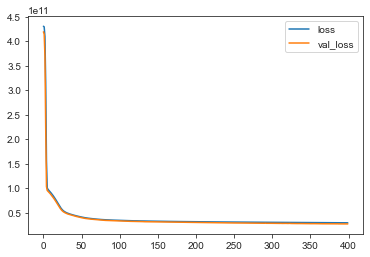

In [31]:
losses.plot()

## Evaluation

In [32]:
predictions = model.predict(X_test)

In [33]:
mean_absolute_error(y_test,predictions)

101316.04467050057

In [34]:
np.sqrt(mean_squared_error(y_test,predictions))

163726.3892644929

In [35]:
explained_variance_score(y_test,predictions)

0.7981786296980469

In [36]:
df['price'].mean()

540296.5735055795

In [37]:
df['price'].median()

450000.0

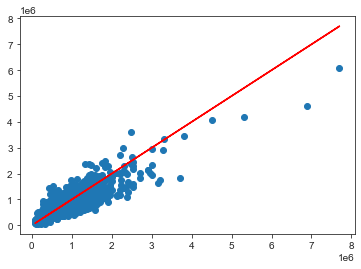

In [38]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [39]:
errors = y_test.values.reshape(6480, 1) - predictions

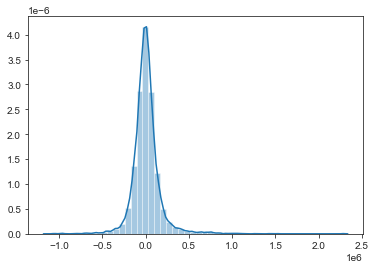

In [40]:
sns.distplot(errors)

## Test Model

In [42]:
single_house = df.drop('price',axis=1).iloc[0]

In [43]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [44]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [45]:
model.predict(single_house)

array([[283707.2]], dtype=float32)

In [46]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64